<a href="https://colab.research.google.com/github/lahari2197/Computervision/blob/main/vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (4)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/archive (4)/ODIR-5K/ODIR-5K/Training Images/2870_left.jpg
/content/drive/MyDrive/archive (4)/ODIR-5K/ODIR-5K/Training Images/2902_left.jpg
/content/drive/MyDrive/archive (4)/ODIR-5K/ODIR-5K/Training Images/2876_right.jpg
/content/drive/MyDrive/archive (4)/ODIR-5K/ODIR-5K/Training Images/286_left.jpg
/content/drive/MyDrive/archive (4)/ODIR-5K/ODIR-5K/Training Images/2906_left.jpg
/content/drive/MyDrive/archive (4)/ODIR-5K/ODIR-5K/Training Images/2901_right.jpg
/content/drive/MyDrive/archive (4)/ODIR-5K/ODIR-5K/Training Images/2886_left.jpg
/content/drive/MyDrive/archive (4)/ODIR-5K/ODIR-5K/Training Images/2895_right.jpg
/content/drive/MyDrive/archive (4)/ODIR-5K/ODIR-5K/Training Images/2870_right.jpg
/content/drive/MyDrive/archive (4)/ODIR-5K/ODIR-5K/Training Images/2883_right.jpg
/content/drive/MyDrive/archive (4)/ODIR-5K/ODIR-5K/Training Images/28_right.jpg
/content/drive/MyDrive/archive (4)/ODIR-5K/ODIR-5K/Trai

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/archive (4)/full_df.csv")
df.head(3)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg


In [ ]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [ ]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,A,H,M,O,filepath,labels,target,filename,left_cataract,right_cataract
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,1,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,0,0
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,0,0
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,0,0
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,0,0
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,0,0
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,0,0


In [ ]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
left_cataract[:15]


array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg'], dtype=object)

In [ ]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [ ]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


In [ ]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]

array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg'], dtype=object)

In [ ]:
#concating two arrays to make an array for cataract dataset (pic file names) and normal file names
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [ ]:
print(len(cataract),len(normal))

594 500


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import cv2
import numpy as np
from tqdm import tqdm
import random

dataset_dir = "/content/drive/MyDrive/archive (4)/preprocessed_images"
image_size = 224
labels = []
dataset = []

def create_dataset(image_category, label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir, img)
        try:
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.resize(image, (image_size, image_size))
            # Ensure the image is in RGB format (cv2 loads in BGR)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        except:
            continue

        dataset.append([np.array(image_rgb), np.array(label)])

    random.shuffle(dataset)
    return dataset


In [ ]:
dataset = create_dataset(cataract,1)

100%|██████████| 594/594 [02:25<00:00,  4.10it/s] 


In [ ]:
len(dataset)

588

In [ ]:
dataset = create_dataset(normal,0)

100%|██████████| 500/500 [00:03<00:00, 130.13it/s]


In [ ]:
len(dataset)

1088

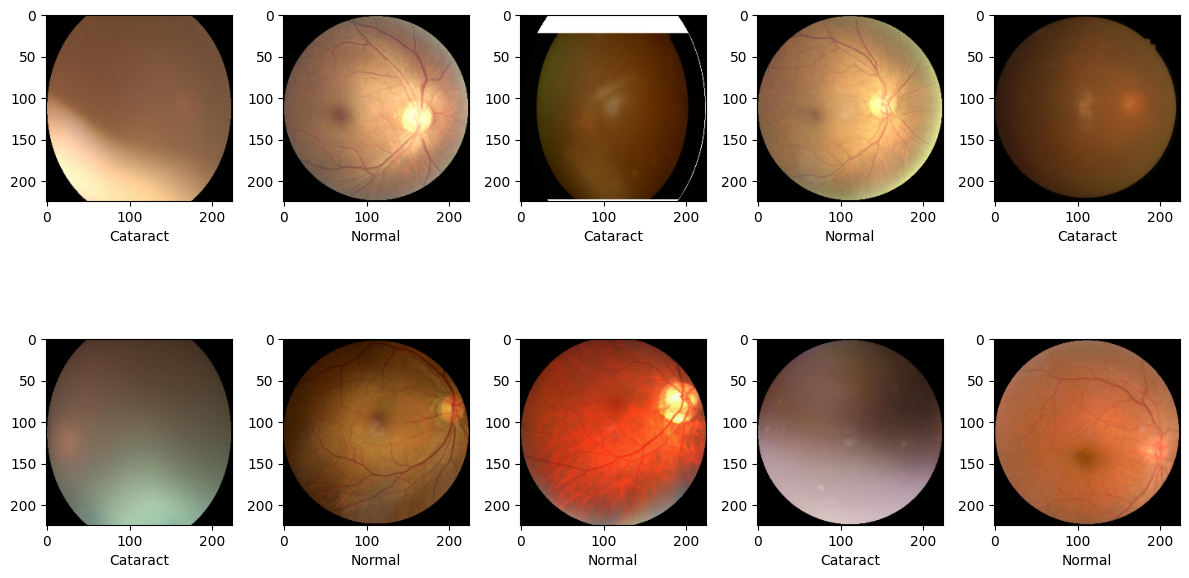

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()

In [ ]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="accuracy",patience=5,verbose=1)

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input
vgg16_weight_path = 'vgg19.h5'
input_shape=(224,224,3)
vgg = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
from tensorflow.keras import Sequential
from keras import layers
from tensorflow.keras.layers import Flatten,Dense
model = Sequential() # will add layers sequentially, more info: https://keras.io/api/
model.add(vgg)
model.add(Dense(256, activation='relu')) #1188 images, features are 224*224*3 for each image
model.add(layers.Dropout(rate=0.5)) #deactivating 50% of the nodes from this layer
model.add(Dense(128, activation='sigmoid'))
model.add(layers.Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(Flatten()) #linearizing the images. output of previous layer of size 224*224*3 is flattened to 1 dimension
model.add(Dense(1,activation="sigmoid")) #should use sigmoid in final layer, takes the max val in calc, good for final layer/decision

In [ ]:
for layer in vgg.layers:
    layer.trainable = False #I don't want to train vgg further, just want to use it's ëxpertise

In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dense (Dense)               (None, 7, 7, 256)         131328    
                                                                 
 dropout (Dropout)           (None, 7, 7, 256)         0         
                                                                 
 dense_1 (Dense)             (None, 7, 7, 128)         32896     
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 dense_2 (Dense)             (None, 7, 7, 64)          8256      
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 64)          0

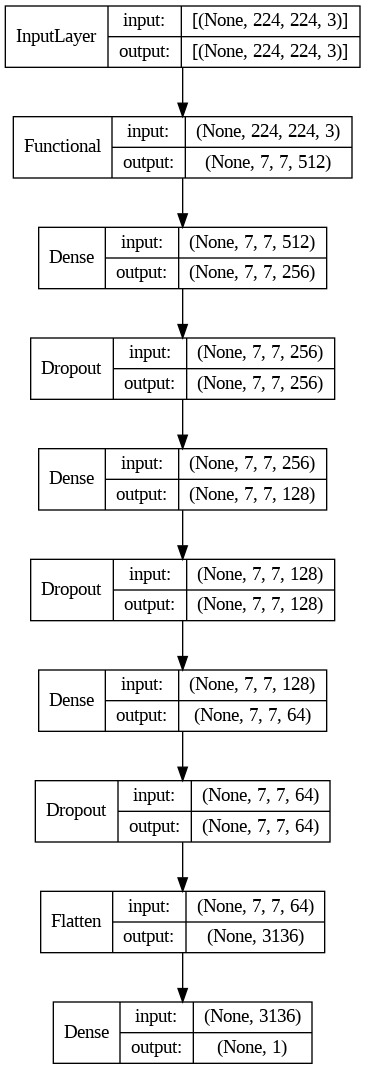

In [ ]:
from tensorflow.keras.utils import plot_model

# Save the model summary to a file
with open('model.summary.txt', 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))

# Convert the model summary to a flowchart
plot_model(model, to_file='model_flowchart.png', show_shapes=True, show_layer_names=False)

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="accuracy",patience=5,verbose=1)

In [ ]:
history = model.fit(x_train,y_train,batch_size=2,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
435/435 [==============================] - 13s 25ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.3315 - val_accuracy: 0.9633
Epoch 2/20
435/435 [==============================] - 10s 22ms/step - loss: 0.0697 - accuracy: 0.9793 - val_loss: 0.1417 - val_accuracy: 0.9587
Epoch 3/20
435/435 [==============================] - 10s 24ms/step - loss: 0.0419 - accuracy: 0.9862 - val_loss: 0.1518 - val_accuracy: 0.9541
Epoch 4/20
435/435 [==============================] - 10s 22ms/step - loss: 0.0140 - accuracy: 0.9977 - val_loss: 0.1801 - val_accuracy: 0.9541
Epoch 5/20
435/435 [==============================] - 10s 22ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.1427 - val_accuracy: 0.9633
Epoch 6/20
435/435 [==============================] - 9s 21ms/step - loss: 0.0179 - accuracy: 0.9931 - val_loss: 0.2026 - val_accuracy: 0.9725
Epoch 7/20
435/435 [==============================] - 10s 22ms/step - loss: 0.0362 - accuracy: 0.9897 - val_loss: 0.2526 - val_accuracy: 

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


7/7 [==============================] - 10s 772ms/step - loss: 0.2089 - accuracy: 0.9725
Loss: 0.2089129388332367
Accuracy: 0.9724770784378052


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# y_pred = model.predict_classes(x_test)
y_pred = (model.predict(x_test) > 0.5).astype("int32")

7/7 [==============================] - 1s 123ms/step


In [ ]:
accuracy_score(y_test,y_pred)

0.9724770642201835

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       105
           1       0.96      0.99      0.97       113

    accuracy                           0.97       218
   macro avg       0.97      0.97      0.97       218
weighted avg       0.97      0.97      0.97       218



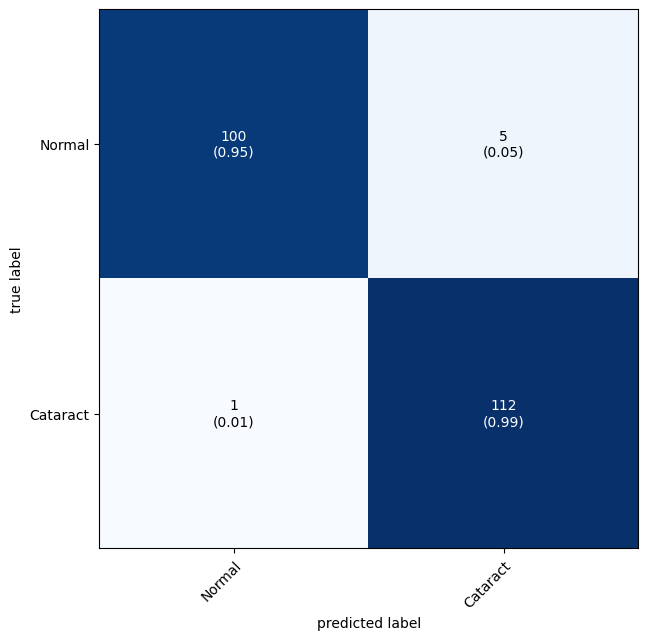

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);

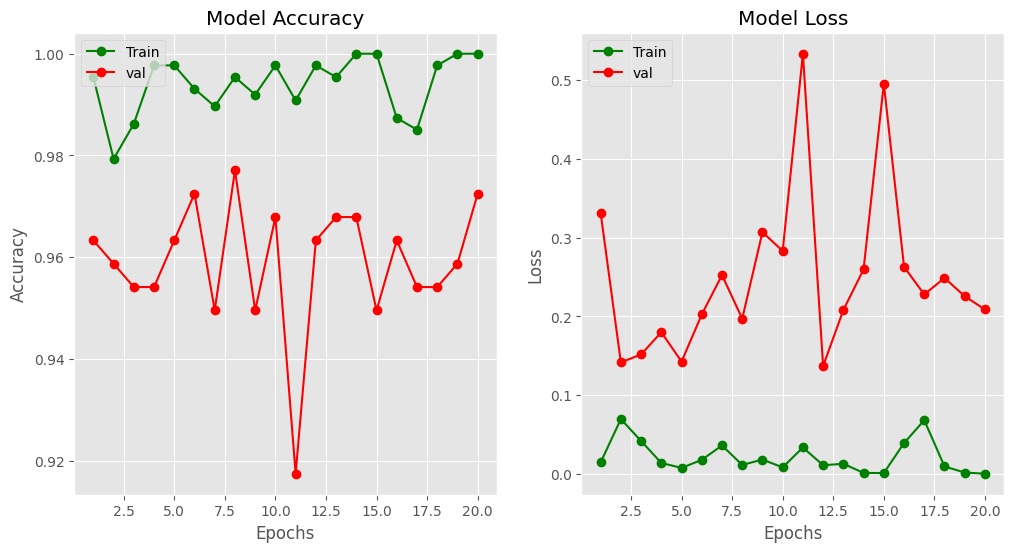

In [ ]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,21)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()



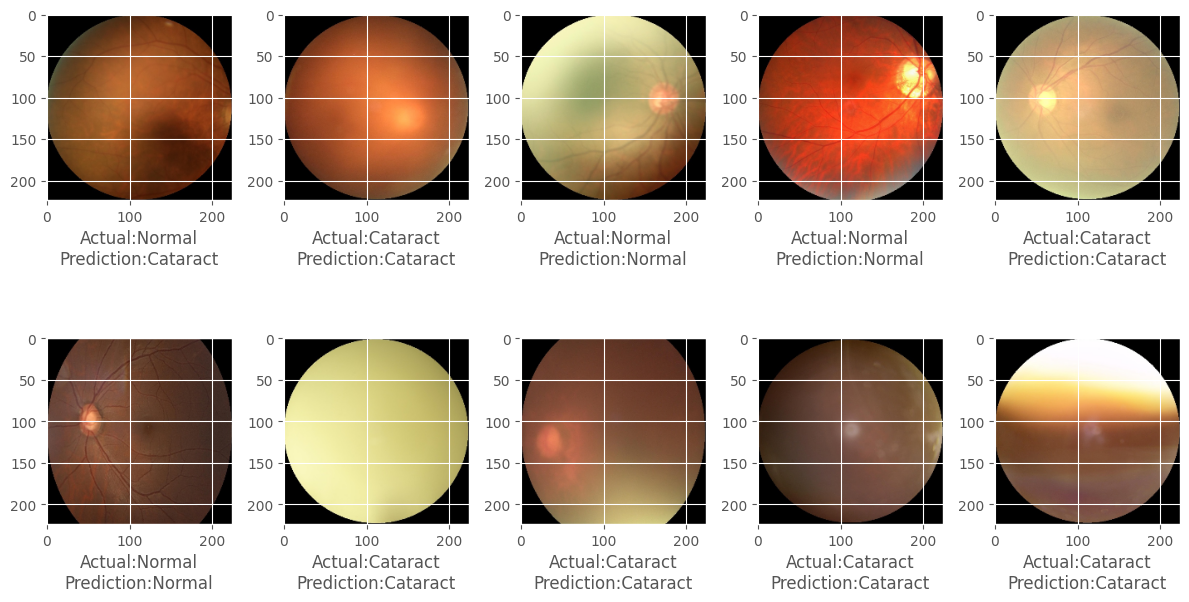

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred[sample]

    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"

    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"

    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()